In [1]:
#import zipfile
#from zipfile import ZipFile

In [2]:
#path=r"D:\DAA\rakshitha\prodigy_infotech\cat_dog_classification\dogs-vs-cats\train.zip"
#folder=r"D:\DAA\rakshitha\prodigy_infotech\cat_dog_classification"
#with ZipFile(path,'r') as z:
    #z.extract(folder)
    #print("Done")


In [3]:
pip install opencv-python

In [4]:
import cv2 as cv
from skimage.feature import hog


In [5]:
input1=r"D:\DAA\rakshitha\prodigy_infotech\CatvsDog\train"
target_size=(64,64)

In [6]:
import os
import numpy as np


In [7]:
def process(folder_path, target_size=(64, 64)):
    X = []
    y = []
    for filename in os.listdir(folder_path):
        if filename.lower().startswith(('cat', 'dog')):
            label = 0 if filename.lower().startswith('cat') else 1
            path = os.path.join(folder_path, filename)
            img = cv.imread(path)
            if img is None:
                continue
            resized = cv.resize(img, target_size)
            gray = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)
            hog_features, _ = hog(
                gray, orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), block_norm='L2', visualize=True
            )   
            X.append(hog_features)
            y.append(label)
    return np.array(X), np.array(y)
X, y = process(input1, target_size)    
X = X / 255.0

In [8]:
print(X.shape)
print(y.shape)

(25000, 1764)
(25000,)


In [9]:
print(os.listdir(input1)[:5])  # should list some filenames like 'cat.0.jpg

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.svm import SVC

In [12]:
indices = np.arange(len(X_train))
np.random.shuffle(indices)

In [13]:
X_small_train = X_train[indices[:5000]]
y_small_train = y_train[indices[:5000]]

In [14]:
X_small_test = X_test[:1000]
y_small_test = y_test[:1000]

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf','poly']
}

In [17]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=3)

In [18]:
grid.fit(X_small_train, y_small_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  22.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  21.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  21.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  23.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  23.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  22.7s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  16.3s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  16.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  15.6s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=  20.3s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=  20.4s
[CV] END ..................C=0.1, gamma=0.001, 

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': ['scale', 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=2)

In [19]:
print("Best parameters found:", grid.best_params_)
print("Best accuracy score:", grid.best_score_)

Best parameters found: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy score: 0.7522005802921049


In [20]:

np.unique(y_small_train, return_counts=True)

(array([0, 1]), array([2450, 2550], dtype=int64))

In [21]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', gamma='scale', C=10)
model.fit(X_train, y_train)

SVC(C=10)

In [22]:
y_pred = model.predict(X_test)


In [23]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7858
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      2515
           1       0.78      0.79      0.79      2485

    accuracy                           0.79      5000
   macro avg       0.79      0.79      0.79      5000
weighted avg       0.79      0.79      0.79      5000



In [24]:
print(np.unique(y_train))  

[0 1]


In [25]:
import matplotlib.pyplot as plt

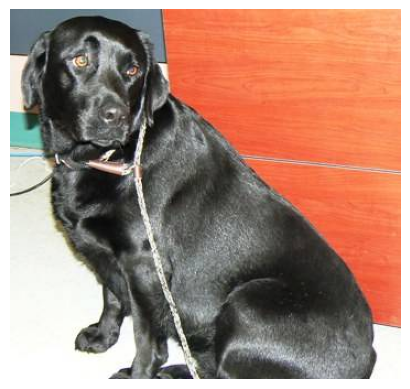

In [26]:
test_img = cv.imread(r"D:\DAA\rakshitha\prodigy_infotech\CatvsDog\test1\365.jpg")
plt.imshow(cv.cvtColor(test_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
                     

In [27]:
if test_img is not None and len(test_img.shape) == 3:
    resized_img = cv.resize(test_img, (64, 64))
    gray_img = cv.cvtColor(resized_img, cv.COLOR_BGR2GRAY)
else:
    print("Invalid image")
    exit()
hog_features, _ = hog(
    gray_img,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm='L2',
    visualize=True
)
hog_features = hog_features / 255.0 
hog_features = hog_features.reshape(1, -1)

prediction = model.predict(hog_features)
print("Predicted class:", "Cat" if prediction[0] == 0 else "Dog")
    

Predicted class: Dog


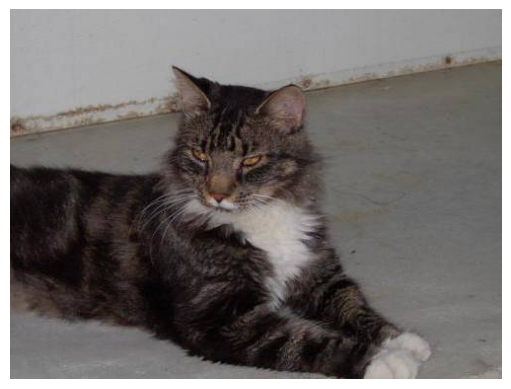

Predicted class: Cat


In [28]:

test_img = cv.imread(r"D:\DAA\rakshitha\prodigy_infotech\CatvsDog\test1\454.jpg")
plt.imshow(cv.cvtColor(test_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
if test_img is not None and len(test_img.shape) == 3:
    resized_img = cv.resize(test_img, (64, 64))
    gray_img = cv.cvtColor(resized_img, cv.COLOR_BGR2GRAY)
else:
    print("Invalid image")
    exit()
hog_features, _ = hog(
    gray_img,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm='L2',
    visualize=True
)   
hog_features = hog_features / 255.0  
hog_features = hog_features.reshape(1, -1)

prediction = model.predict(hog_features)
print("Predicted class:", "Cat" if prediction[0] == 0 else "Dog")
    


In [29]:
print("Raw prediction:", prediction)


Raw prediction: [0]


In [30]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([ 9985, 10015], dtype=int64))

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      2515
           1       0.78      0.79      0.79      2485

    accuracy                           0.79      5000
   macro avg       0.79      0.79      0.79      5000
weighted avg       0.79      0.79      0.79      5000

Confusion Matrix:
 [[1956  559]
 [ 512 1973]]


In [32]:
print(np.unique(y, return_counts=True))

(array([0, 1]), array([12500, 12500], dtype=int64))


In [33]:
X = process(input1, target_size=(64, 64))
print("Feature shape:", X[0].shape)


Feature shape: (25000, 1764)


In [34]:
import os
import cv2 as cv

import pandas as pd
def prepare_image_for_prediction(image_path, size=(64, 64)):
    img = cv.imread(image_path)
    if img is None:
        return None
    resized = cv.resize(img, size)
    gray = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)
    features, _ = hog(
        gray, orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2',
        visualize=True
    )   
    return features / 255.0
test_folder = (r"D:\DAA\rakshitha\prodigy_infotech\CatvsDog\test1")
results = []
for filename in os.listdir(test_folder):
    if filename.lower().endswith(('.jpg', '.png')):
        image_path = os.path.join(test_folder, filename)
        features = prepare_image_for_prediction(image_path)
        if features is not None:
            prediction = model.predict([features])[0]
            image_id = os.path.splitext(filename)[0]  
            results.append({
                "id": image_id,
                "label": prediction
            })
df = pd.DataFrame(results)
df.to_csv("submission.csv", index=False)
print("submission.csv")            

submission.csv


In [35]:
import pickle

In [36]:
with open("catvsdog.pkl","wb")as f:
    pickle.dump(model,f)
    
hog_params = {
    "orientations": 9,
    "pixels_per_cell": (8, 8),
    "cells_per_block": (2, 2),
    "block_norm": "L2"
}

with open("hog_config.pkl", "wb") as f:
    pickle.dump(hog_params, f)